# Generate magnitude and phase plot from .aif impulse response

Audio loaded with sampling rate = 48000 Hz and 32706 samples.


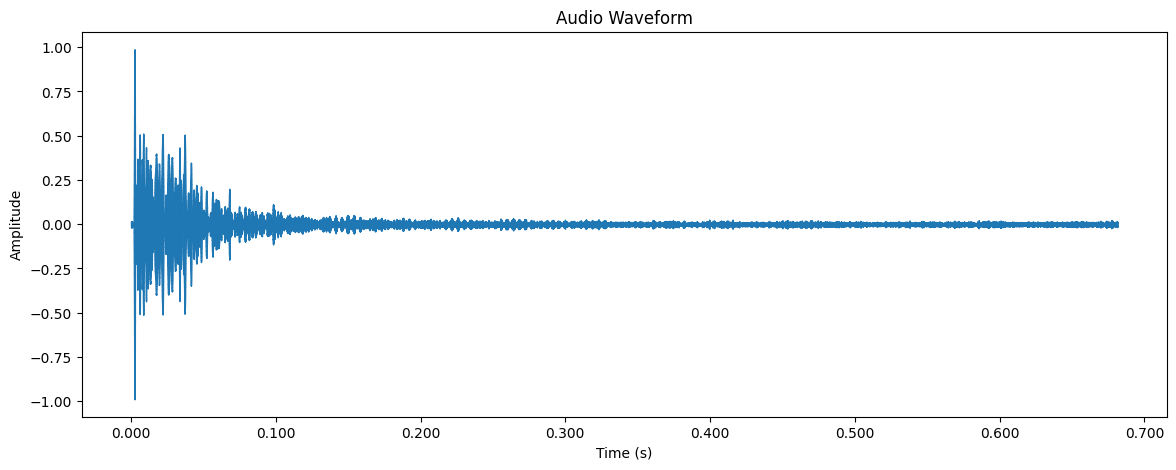

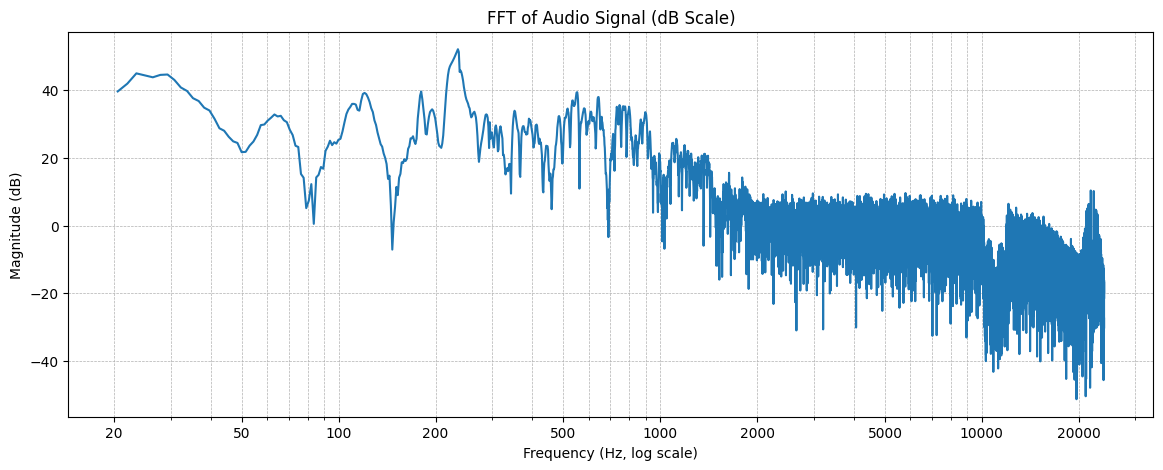

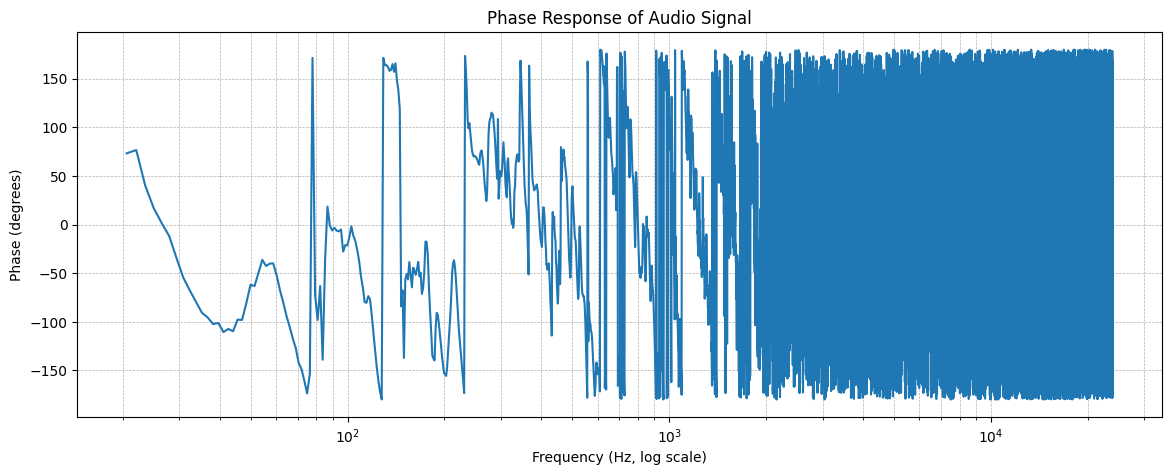

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy

# filename = 'deconv_responses/IR_v2_1.wav'
filename = 'deconv_responses/DualBP1.wav'
y, sr = librosa.load(filename, sr=None)
print(f"Audio loaded with sampling rate = {sr} Hz and {len(y)} samples.")

plt.figure(figsize=(14, 5))
y = y[:(3*sr)]
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Compute FFT and corresponding frequency values
fft_vals = np.fft.fft(y)
fft_mag = np.abs(fft_vals)
fft_freq = np.fft.fftfreq(len(fft_vals), 1/sr)

# Filter to keep only positive frequencies
mask = fft_freq > 20
fft_freq_pos = fft_freq[mask]
fft_mag_pos = fft_mag[mask]

# Convert magnitude to decibels
epsilon = 1e-10
fft_db = 20 * np.log10(fft_mag_pos + epsilon)

plt.figure(figsize=(14, 5))
plt.plot(fft_freq_pos, fft_db)
plt.xscale('log')
plt.title("FFT of Audio Signal (dB Scale)")
plt.xlabel("Frequency (Hz, log scale)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", ls="--", lw=0.5)

# Define custom reference frequency ticks (in Hz)
reference_ticks = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(reference_ticks, reference_ticks)

plt.show()
phase_rad = np.angle(fft_vals)
phase_deg = np.degrees(phase_rad)
phase_deg_pos = phase_deg[mask]
plt.figure(figsize=(14, 5))
plt.plot(fft_freq_pos, phase_deg_pos)
plt.xscale('log')
plt.title("Phase Response of Audio Signal")
plt.xlabel("Frequency (Hz, log scale)")
plt.ylabel("Phase (degrees)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

# Plot and average responses

Found groups: {'9': ['hammer_responses/Hammer_9_21.wav', 'hammer_responses/Hammer_9_35.wav', 'hammer_responses/Hammer_9_07.wav'], '14': ['hammer_responses/Hammer_14_01.wav', 'hammer_responses/Hammer_14_02.wav', 'hammer_responses/Hammer_14_03.wav'], '2': ['hammer_responses/Hammer_2_14.wav', 'hammer_responses/Hammer_2_02.wav', 'hammer_responses/Hammer_2_25.wav'], '11': ['hammer_responses/Hammer_11_18.wav', 'hammer_responses/Hammer_11_32.wav', 'hammer_responses/Hammer_11_08.wav'], '7': ['hammer_responses/Hammer_7_22.wav', 'hammer_responses/Hammer_7_09.wav', 'hammer_responses/Hammer_7_34.wav'], '5': ['hammer_responses/Hammer_5_30.wav', 'hammer_responses/Hammer_5_39.wav', 'hammer_responses/Hammer_5_38.wav'], '6': ['hammer_responses/Hammer_6_12.wav', 'hammer_responses/Hammer_6_24.wav', 'hammer_responses/Hammer_6_37.wav'], '1': ['hammer_responses/Hammer_1_33.wav', 'hammer_responses/Hammer_1_19.wav', 'hammer_responses/Hammer_1_06.wav'], '10': ['hammer_responses/Hammer_10_11.wav', 'hammer_respo

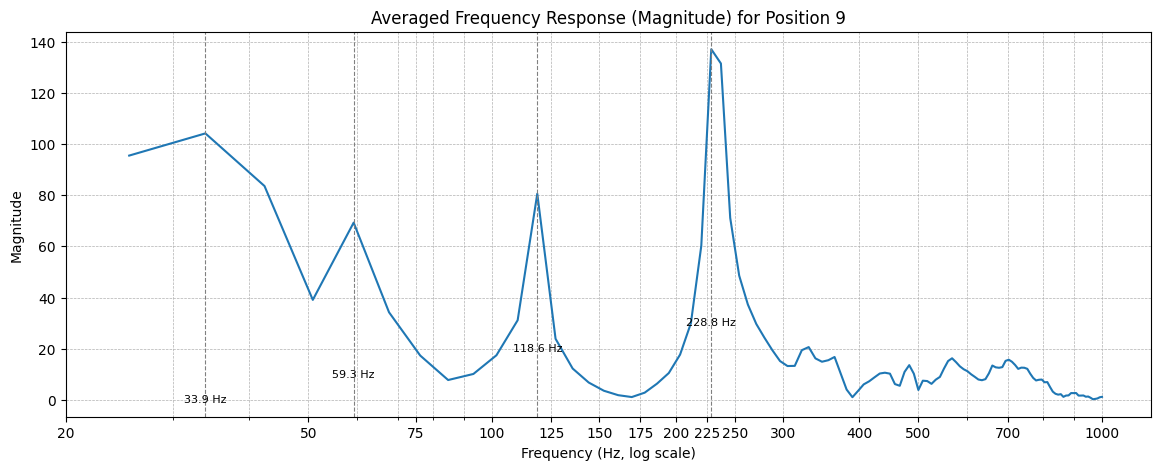


Processing group 14 with files: ['hammer_responses/Hammer_14_01.wav', 'hammer_responses/Hammer_14_02.wav', 'hammer_responses/Hammer_14_03.wav']


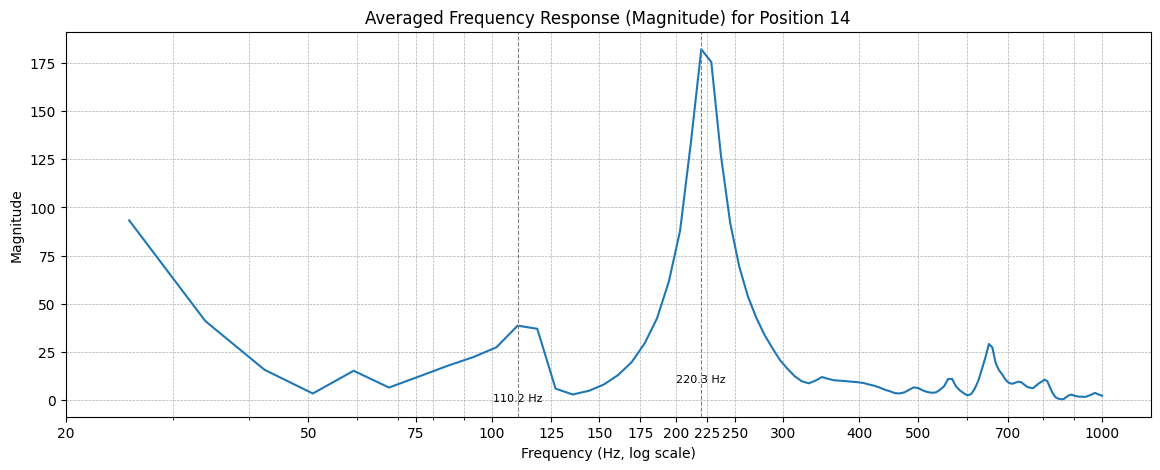


Processing group 2 with files: ['hammer_responses/Hammer_2_14.wav', 'hammer_responses/Hammer_2_02.wav', 'hammer_responses/Hammer_2_25.wav']


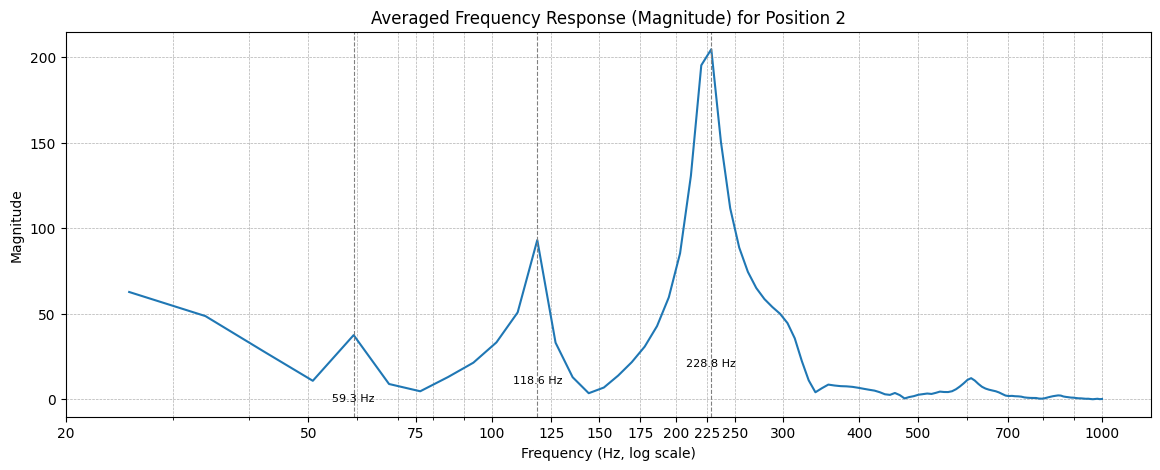


Processing group 11 with files: ['hammer_responses/Hammer_11_18.wav', 'hammer_responses/Hammer_11_32.wav', 'hammer_responses/Hammer_11_08.wav']


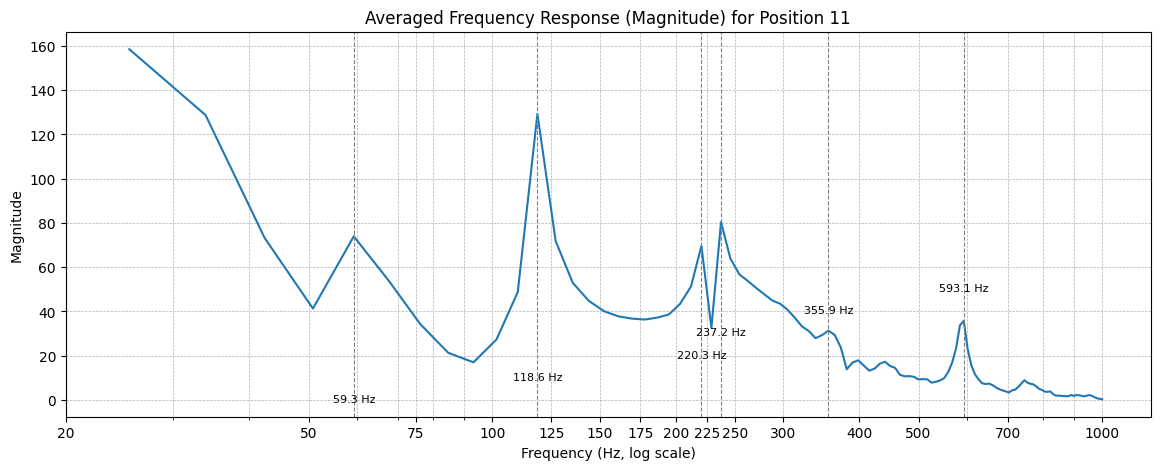


Processing group 7 with files: ['hammer_responses/Hammer_7_22.wav', 'hammer_responses/Hammer_7_09.wav', 'hammer_responses/Hammer_7_34.wav']


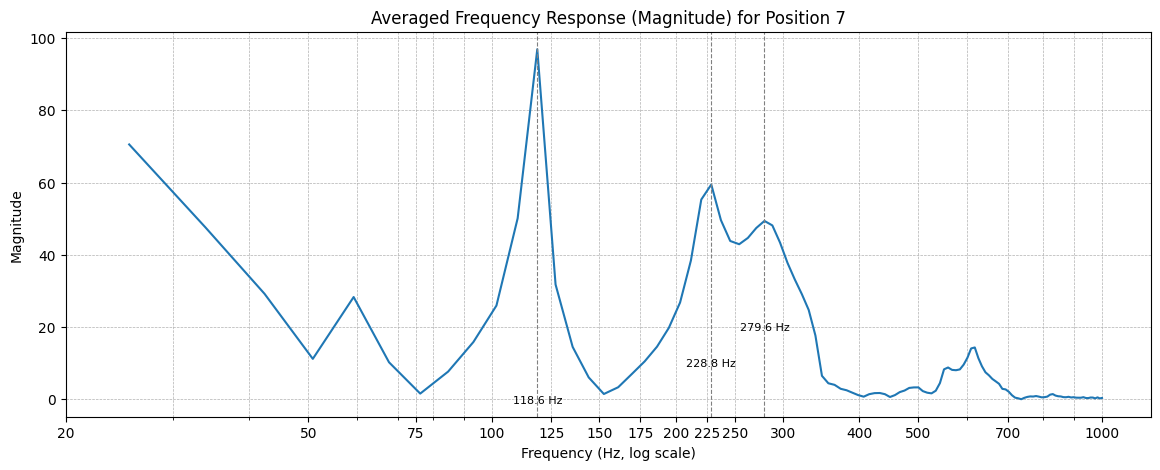


Processing group 5 with files: ['hammer_responses/Hammer_5_30.wav', 'hammer_responses/Hammer_5_39.wav', 'hammer_responses/Hammer_5_38.wav']


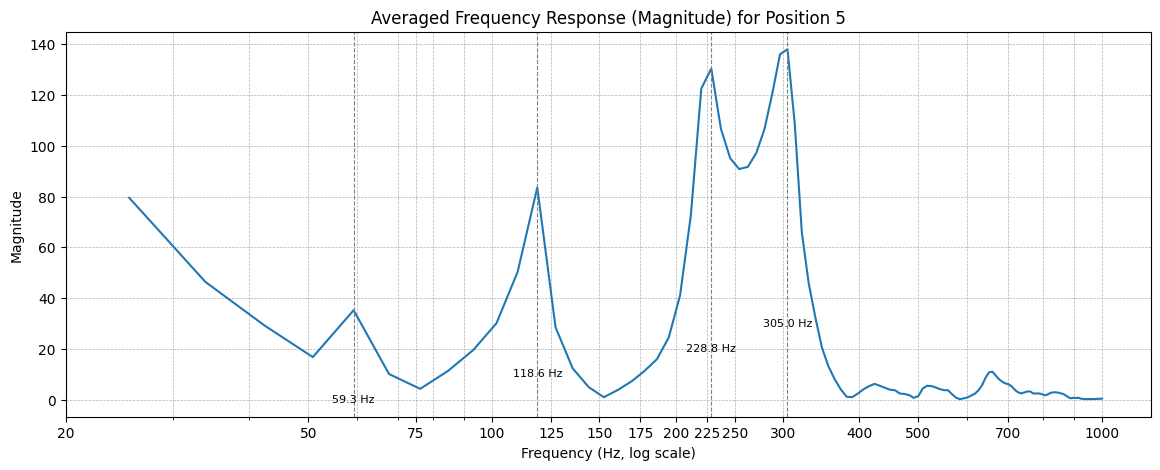


Processing group 6 with files: ['hammer_responses/Hammer_6_12.wav', 'hammer_responses/Hammer_6_24.wav', 'hammer_responses/Hammer_6_37.wav']


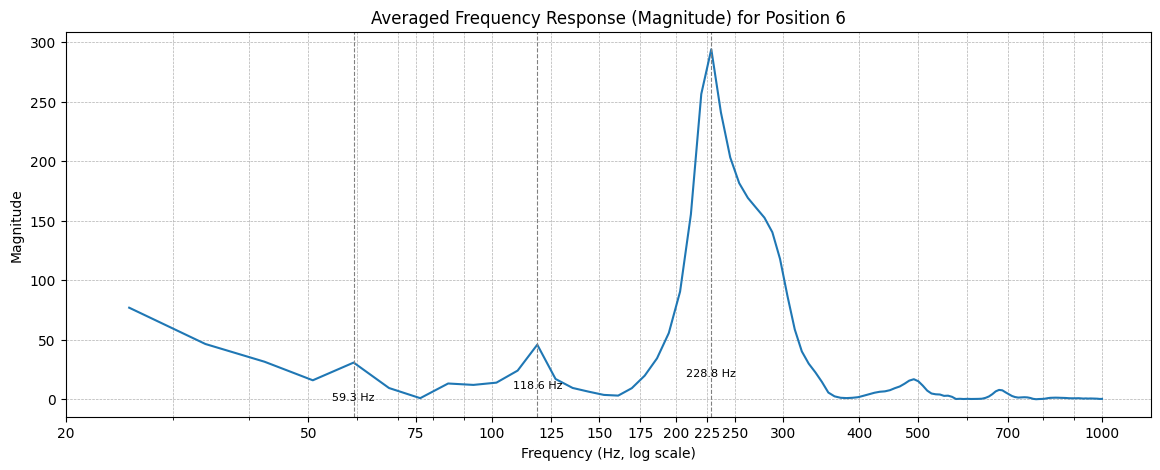


Processing group 1 with files: ['hammer_responses/Hammer_1_33.wav', 'hammer_responses/Hammer_1_19.wav', 'hammer_responses/Hammer_1_06.wav']


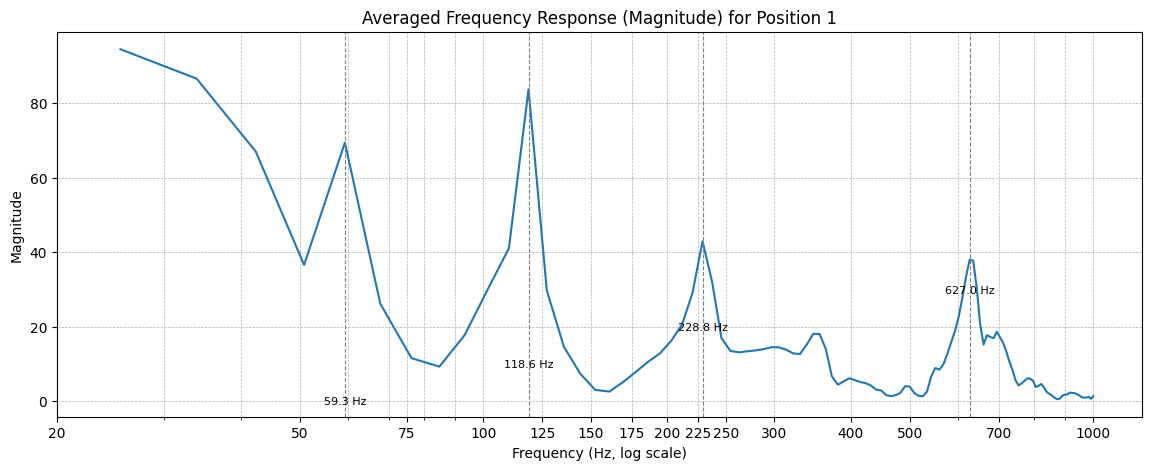


Processing group 10 with files: ['hammer_responses/Hammer_10_11.wav', 'hammer_responses/Hammer_10_36.wav', 'hammer_responses/Hammer_10_23.wav']


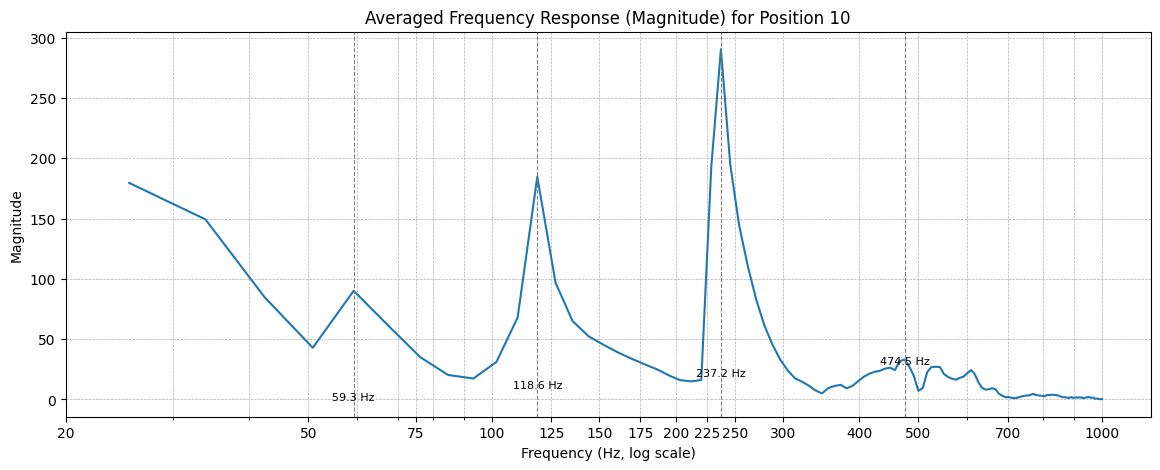


Processing group 4 with files: ['hammer_responses/Hammer_4_15.wav', 'hammer_responses/Hammer_4_05.wav', 'hammer_responses/Hammer_4_27.wav']


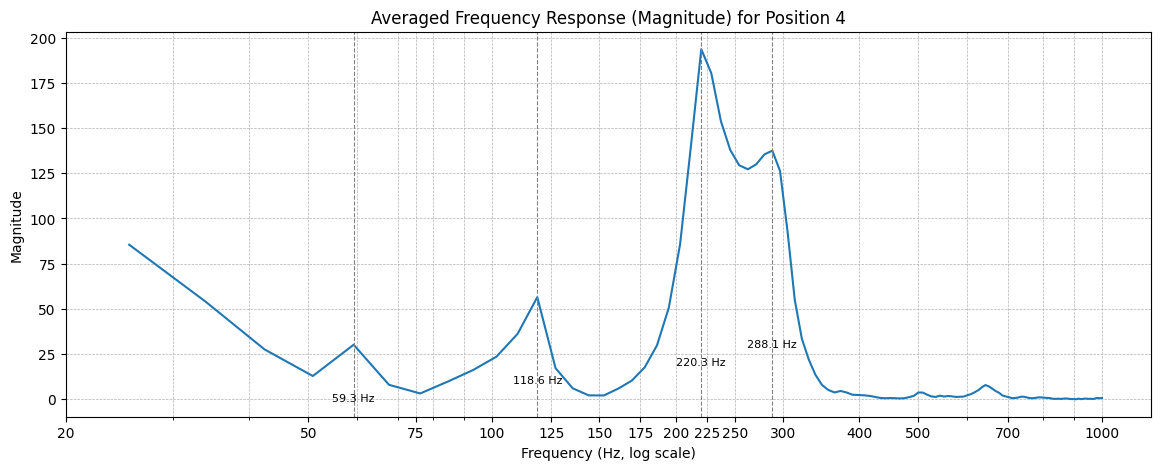


Processing group 12 with files: ['hammer_responses/Hammer_12_01.wav', 'hammer_responses/Hammer_12_13.wav', 'hammer_responses/Hammer_12_26.wav']


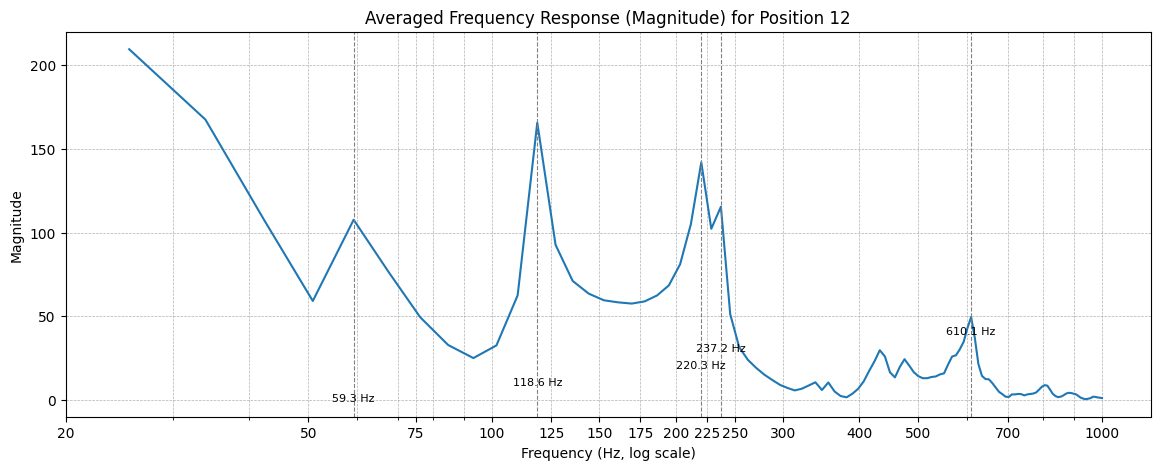


Processing group 8 with files: ['hammer_responses/Hammer_8_10.wav', 'hammer_responses/Hammer_8_20.wav', 'hammer_responses/Hammer_8_31.wav']


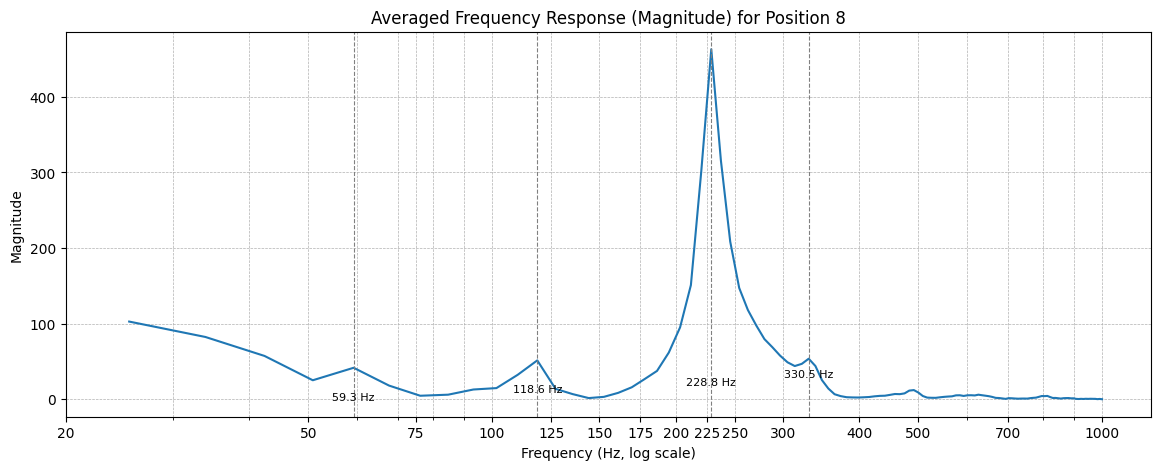


Processing group 3 with files: ['hammer_responses/Hammer_3_03.wav', 'hammer_responses/Hammer_3_17.wav', 'hammer_responses/Hammer_3_28.wav']


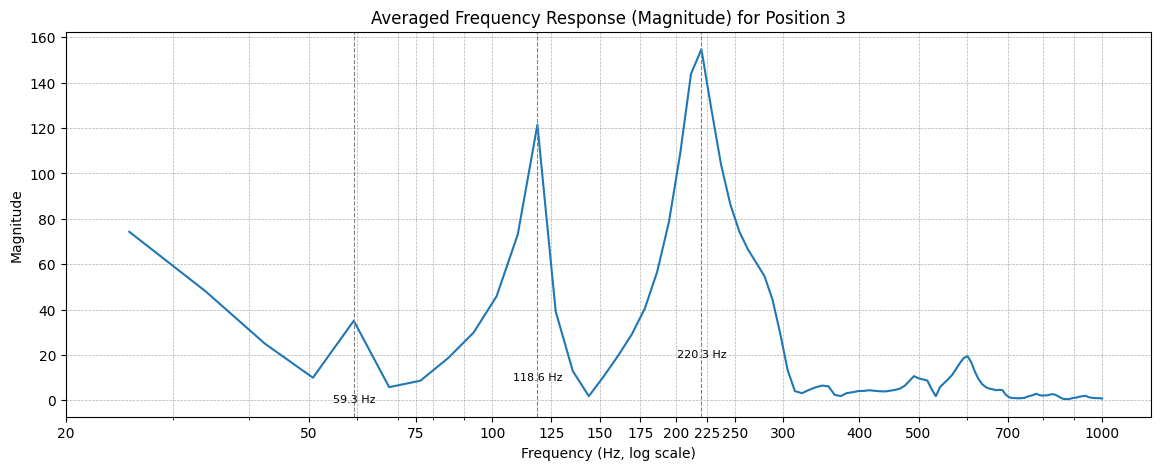


Processing group 13 with files: ['hammer_responses/Hammer_13_29.wav', 'hammer_responses/Hammer_13_16.wav', 'hammer_responses/Hammer_13_04.wav']


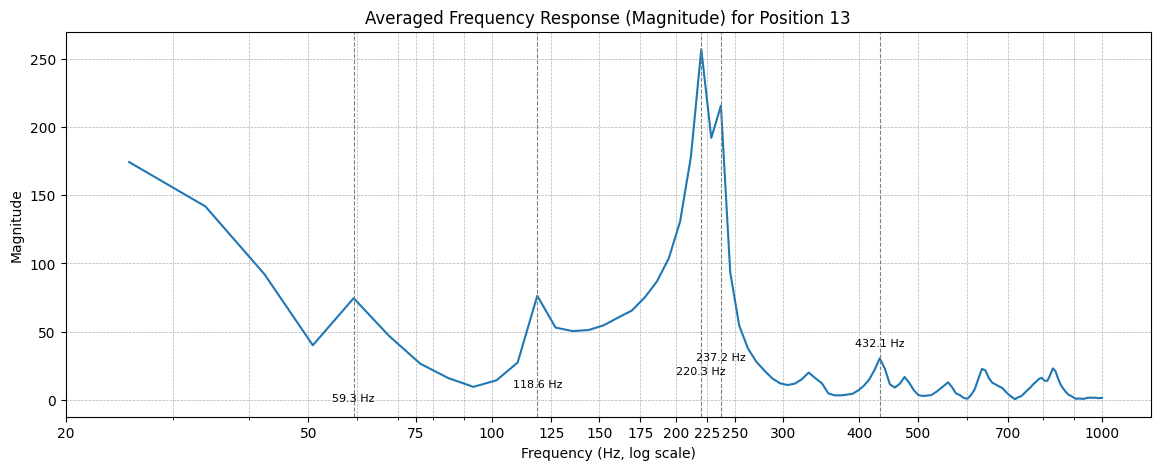

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
import re
import os

import scipy.signal

folder = 'hammer_responses/'
save_dir = 'hammer_plots'
os.makedirs(save_dir, exist_ok=True)

files = glob.glob(os.path.join(folder, 'Hammer_*.wav'))

groups = {}
pattern = re.compile(r'Hammer_(\d+)_\d+\.wav')
for file in files:
    basename = os.path.basename(file)
    match = pattern.match(basename)
    if match:
        n = match.group(1)
        groups.setdefault(n, []).append(file)

print("Found groups:", groups)

epsilon = 1e-10  # small value to avoid log(0)

for n, file_list in groups.items():
    print(f"\nProcessing group {n} with files: {file_list}")
    avg_fft = None
    count = 0
    for file in file_list:
        y, sr = librosa.load(file, sr=None)
        y = y[:5665]
        if np.max(np.abs(y)) > 0:
            y = y / np.max(np.abs(y))
        if len(y) > 3 * sr:
            y = y[:3 * sr]
        fft_vals = np.fft.fft(y)
        if avg_fft is None:
            avg_fft = np.zeros_like(fft_vals, dtype=complex)
        avg_fft += fft_vals
        count += 1

    avg_fft /= count
    fft_freq = np.fft.fftfreq(len(avg_fft), 1/sr)
    mask = fft_freq > 20
    fft_freq_pos = fft_freq[mask]
    fft_mag = np.abs(avg_fft[mask])
    # fft_db = 20 * np.log10(fft_mag + epsilon)
    fft_db = fft_mag
    peaks = scipy.signal.find_peaks(fft_db, height=30)

    plt.figure(figsize=(14, 5))
    freq_range_mask = (fft_freq_pos >= 20) & (fft_freq_pos <= 1000)
    plt.plot(fft_freq_pos[freq_range_mask], fft_db[freq_range_mask])
    # plt.plot(fft_freq_pos, fft_db)
    plt.xscale('log')
    plt.title(f"Averaged Frequency Response (Magnitude) for Position {n}")
    plt.xlabel("Frequency (Hz, log scale)")
    plt.ylabel("Magnitude")
    plt.grid(True, which="both", ls="--", lw=0.5)
    count = 0
    for peak_idx in peaks[0]:
        peak_freq = fft_freq_pos[peak_idx]
        plt.axvline(x=peak_freq, color='grey', linestyle='--', linewidth=0.8)
        plt.text(peak_freq, count * 10 - 1, f"{peak_freq:.1f} Hz", color='black', fontsize=8, ha='center')
        count += 1

    # reference_ticks = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
    reference_ticks = [20, 50, 75, 100, 125, 150, 175, 200, 225, 250, 300, 400, 500, 700, 1000]
    plt.xticks(reference_ticks, reference_ticks)

    magnitude_filename = os.path.join(save_dir, f"freq_response_position_{n}.png")
    plt.savefig(magnitude_filename, dpi=300, bbox_inches='tight')
    plt.show()
    